In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
batch_size = 32
img_height = 128
img_width = 128

# the data is in a special format. It's in a folder called "data".
# inside that folder are subfolders with each of the category names (ex: "epidural")
# Inside those folders are the relavent images from the dataset. Specifically, they are
# only the max-contrast window images.
data_dir = 'data'

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 114984 files belonging to 7 classes.
Using 91988 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 114984 files belonging to 7 classes.
Using 22996 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['epidural', 'intraparenchymal', 'intraventricular', 'multi', 'normal', 'subarachnoid', 'subdural']


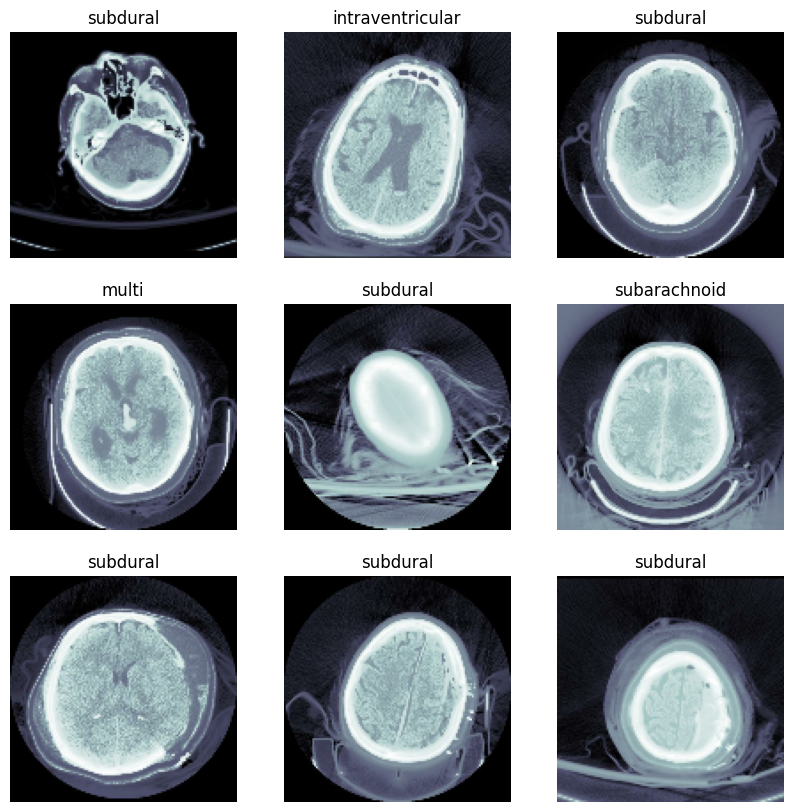

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [8]:
normalization_layer = layers.Rescaling(1./255)

In [9]:
num_classes = len(class_names)

model = keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                    

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2875/2875 [==============================] - 498s 173ms/step - loss: 1.6025 - accuracy: 0.3615 - val_loss: 1.5292 - val_accuracy: 0.3949
Epoch 2/10
2875/2875 [==============================] - 497s 173ms/step - loss: 1.4775 - accuracy: 0.4199 - val_loss: 1.4278 - val_accuracy: 0.4389
Epoch 3/10
2875/2875 [==============================] - 510s 177ms/step - loss: 1.3569 - accuracy: 0.4743 - val_loss: 1.3657 - val_accuracy: 0.4717
Epoch 4/10
2875/2875 [==============================] - 508s 177ms/step - loss: 1.2406 - accuracy: 0.5237 - val_loss: 1.3036 - val_accuracy: 0.5025
Epoch 5/10
2875/2875 [==============================] - 508s 177ms/step - loss: 1.1386 - accuracy: 0.5674 - val_loss: 1.2765 - val_accuracy: 0.5229
Epoch 6/10
2875/2875 [==============================] - 519s 180ms/step - loss: 1.0520 - accuracy: 0.6020 - val_loss: 1.2590 - val_accuracy: 0.5390
Epoch 7/10
2875/2875 [==============================] - 509s 177ms/step - loss: 0.9856 - accuracy: 0.6300 - val_

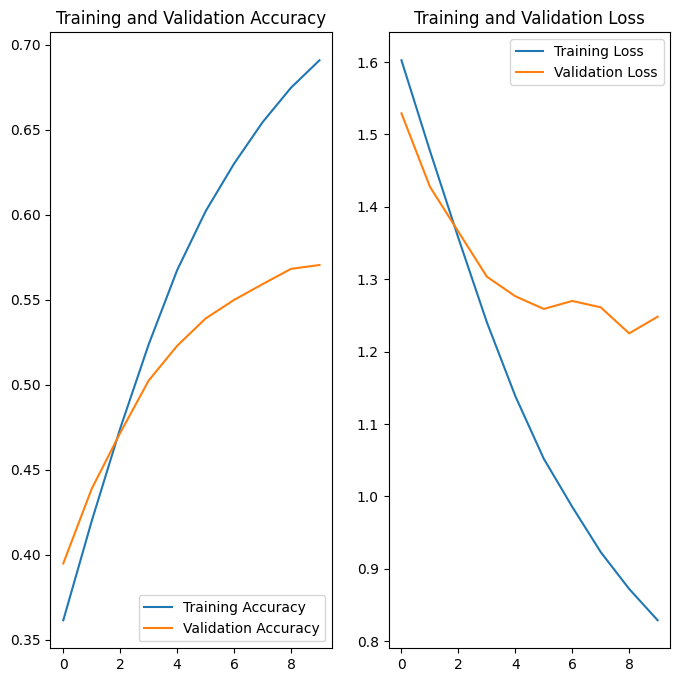

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
from sklearn.metrics import plot_confusion_matrix

In [15]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

C:\Users\ames9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


719/719 [==============================] - 29s 41ms/step


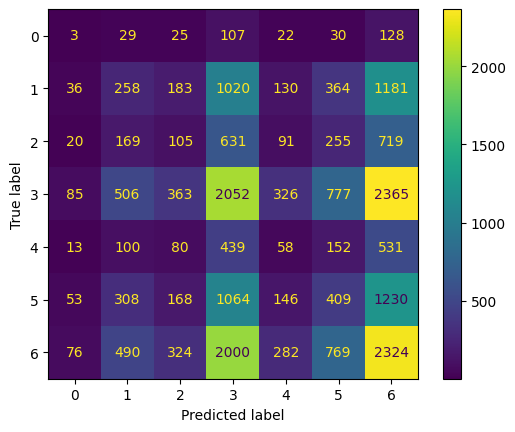

In [16]:
import numpy as np
plot_confusion_matrix(estimator=classifier, X=val_ds, y_true=np.concatenate([y for x, y in val_ds], axis=0))